## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*


Apply Bayes’ theorem with log on posterior
$$
\log p(\beta | y, X) = -\frac{1}{2} (y - X\beta)^T \Sigma^{-1} (y - X\beta) - \frac{1}{2} (\beta - \beta_0)^T \Sigma_\beta^{-1} (\beta - \beta_0) + C.
$$

Expanding the quadratic terms:

$$
(y - X\beta)^T \Sigma^{-1} (y - X\beta) = y^T \Sigma^{-1} y - 2 \beta^T X^T \Sigma^{-1} y + \beta^T X^T \Sigma^{-1} X \beta,
$$

$$
(\beta - \beta_0)^T \Sigma_\beta^{-1} (\beta - \beta_0) = \beta^T \Sigma_\beta^{-1} \beta - 2 \beta^T \Sigma_\beta^{-1} \beta_0 + \beta_0^T \Sigma_\beta^{-1} \beta_0.
$$

Grouping terms:

$$
\log p(\beta | y, X) = -\frac{1}{2} \left( \beta^T (X^T \Sigma^{-1} X + \Sigma_\beta^{-1}) \beta - 2 \beta^T (X^T \Sigma^{-1} y + \Sigma_\beta^{-1} \beta_0) \right) + C.
$$

Recognizing this as the log of a Normal distribution:

$$
\beta | y, X \sim \mathcal{N}(\mu_{\beta}, \Sigma_{\beta}'),
$$

where:

$$
\Sigma_{\beta}' = \left(X^T \Sigma^{-1} X + \Sigma_\beta^{-1} \right)^{-1},
$$

$$
\mu_{\beta} = \Sigma_{\beta}' \left(X^T \Sigma^{-1} y + \Sigma_\beta^{-1} \beta_0 \right).
$$

assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ Using Bayes’ theorem, the posterior distribution for $\sigma^2$ is proportional to the product of the likelihood and the prior:

$$
p(\sigma^2 | y, \beta) \propto p(y | \beta, \sigma^2) \, p(\sigma^2).
$$

Substituting the expressions, we obtain

$$
p(\sigma^2 | y, \beta) \propto (\sigma^2)^{-\frac{n}{2}} \exp\left(-\frac{1}{2\sigma^2}(y - X\beta)^T(y - X\beta)\right) (\sigma^2)^{-(\alpha^*+1)} \exp\left(-\frac{\beta^*}{\sigma^2}\right).
$$

This simplifies to:

$$
p(\sigma^2 | y, \beta) \propto (\sigma^2)^{-\left(\alpha^* + \frac{n}{2} + 1\right)} \exp\left(-\frac{1}{\sigma^2}\left(\frac{1}{2}(y - X\beta)^T(y - X\beta) + \beta^*\right)\right).
$$

Recognizing this as the kernel of an inverse-gamma distribution, the posterior for $\sigma^2$ is:

$$
\sigma^2 | y, \beta \sim \text{Inv-Gamma}\left(\alpha^* + \frac{n}{2}, \, \beta^* + \frac{1}{2}(y - X\beta)^T(y - X\beta)\right).
$$

### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 269 seconds.


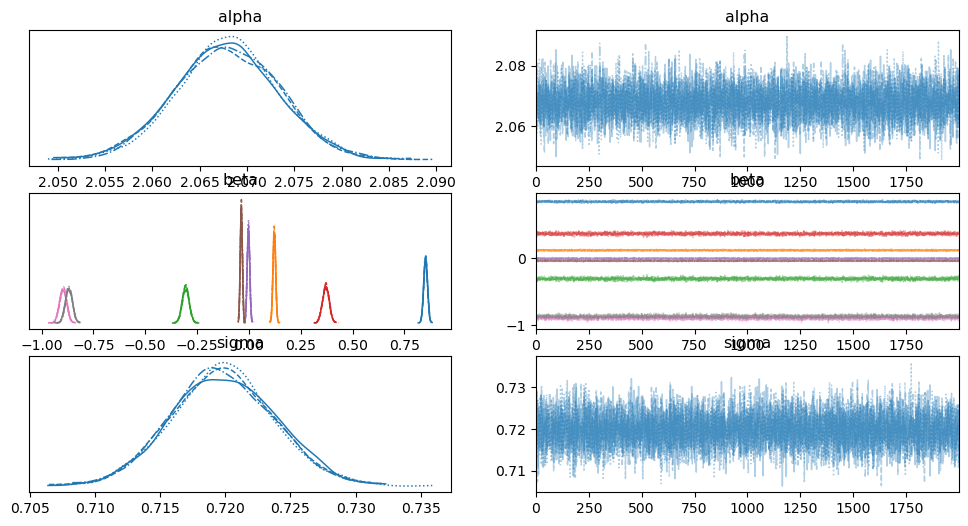

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    2.068  0.005   2.057    2.078        0.0      0.0    7464.0   
beta[0]  0.852  0.009   0.836    0.869        0.0      0.0    3682.0   
beta[1]  0.122  0.006   0.110    0.134        0.0      0.0    6692.0   
beta[2] -0.305  0.016  -0.335   -0.272        0.0      0.0    3472.0   
beta[3]  0.371  0.016   0.341    0.401        0.0      0.0    3729.0   
beta[4] -0.002  0.006  -0.014    0.008        0.0      0.0    7617.0   
beta[5] -0.037  0.005  -0.046   -0.027        0.0      0.0    8231.0   
beta[6] -0.896  0.017  -0.929   -0.866        0.0      0.0    3856.0   
beta[7] -0.868  0.017  -0.899   -0.837        0.0      0.0    3912.0   
sigma    0.720  0.004   0.712    0.727        0.0      0.0    8736.0   

         ess_tail  r_hat  
alpha      5521.0    1.0  
beta[0]    5082.0    1.0  
beta[1]    6126.0    1.0  
beta[2]    4265.0    1.0  
beta[3]    4787.0    1.0  
beta[4]    6050.0    1.0  
beta[5]    5768.0 

In [8]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of predictors
p = X_train.shape[1]

# Bayesian Linear Regression Model
with pm.Model() as model:
    # Priors
    beta = pm.Normal("beta", mu=0, sigma=1, shape=p)  # Normal prior for beta
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Intercept prior
    sigma = pm.HalfNormal("sigma", sigma=1)  # Half-Normal prior for sigma (instead of inverse-gamma)
    
    # Likelihood
    mu = alpha + pm.math.dot(X_train, beta)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)

    # Posterior sampling
    trace = pm.sample(2000, 
                      return_inferencedata=True, 
                      target_accept=0.95)

# Posterior Analysis
az.plot_trace(trace)
plt.show()

# Summary statistics
print(az.summary(trace))

### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?

In [ ]:
# Make a copy so we don't ruin the original data
y_train_robust = y_train.copy()

# Inject outliers by making a few data points extremely large
# e.g., multiply the last 5 training samples by a large factor
y_train_robust[-5:] = y_train_robust[-5:] * 20

with pm.Model() as robust_model:
    # Priors for intercept and slopes
    alpha_r = pm.Normal("alpha_r", mu=0, sigma=10)
    beta_r = pm.Normal("beta_r", mu=0, sigma=10, shape=p)

    # Degrees of freedom for the heavy-tailed distribution.
    # We can either fix nu or put a prior. Here we put a light prior to estimate it.
    nu = pm.Exponential("nu", 1/30)  # or pm.HalfNormal, or a gamma prior, etc.

    # Global precision
    tau = pm.Gamma("tau_global", alpha=2, beta=2)

    # Observation-specific precision multipliers: tau_i
    tau_i = pm.Gamma("tau_i", alpha=nu/2, beta=nu/2, shape=y_train_robust.shape[0])

    # Mean of the linear predictor
    mu_r = alpha_r + pm.math.dot(X_train, beta_r)

    # Each observation i has standard deviation = sqrt(1/(tau * tau_i)).
    sigma_i = pm.Deterministic("sigma_i", 1.0 / np.sqrt(tau * tau_i))

    # Likelihood
    y_obs_r = pm.Normal(
        "y_obs_r",
        mu=mu_r,
        sigma=sigma_i,
        observed=y_train_robust
    )

    # Inference
    trace_robust = pm.sample(
        2000, 
        tune=200,
        target_accept=0.95,
        return_inferencedata=True,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_r, beta_r, nu, tau_global, tau_i]


In [ ]:
# MCMC diagnostics
az.plot_trace(trace_robust, var_names=["alpha_r", "beta_r", "nu", "tau_global"])
plt.show()

print(az.summary(trace_robust, var_names=["alpha_r", "beta_r", "nu", "tau_global"]))

In [ ]:
# Extract posterior samples for sigma_i
posterior_sigma_i = trace_robust.posterior["sigma_i"]  # shape ~ (chain, draw, n_observations)

# Look at the last 5 "known outliers"
outlier_indices = np.arange(len(y_train_robust)-5, len(y_train_robust))
# Posterior median (for instance) of sigma_i for these outliers
sigma_i_medians_outliers = np.median(posterior_sigma_i.stack(draws=("chain","draw"))[..., outlier_indices].values, axis=0)

# Compare with "normal" points (say first 5)
normal_indices = np.arange(5)
sigma_i_medians_normal = np.median(posterior_sigma_i.stack(draws=("chain","draw"))[..., normal_indices].values, axis=0)

print("Outlier indices and median sigma_i:")
for idx, val in zip(outlier_indices, sigma_i_medians_outliers):
    print(f"Index: {idx}, Median sigma_i: {val:.3f}")

print("\nSome 'normal' point indices and median sigma_i:")
for idx, val in zip(normal_indices, sigma_i_medians_normal):
    print(f"Index: {idx}, Median sigma_i: {val:.3f}")

The program run very slowly.